In [16]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_physical_devices('CPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
def loadInputData(path: str):
    pass

# transforms a WAV file into a npArray of shape(1, F, 3) (Time, Feq, Hue)
def fourierTransform(wav):
    pass

# normalizes, so every Component of the furier transform is in [0,1]
def normalizeFurierTransform():
    pass

In [17]:
from keras.datasets import boston_housing
(train_input, train_label), (test_input, test_label) = boston_housing.load_data(test_split=0.2)


In [18]:
max_input = [np.amax(train_input[:,i]) for i in range(train_input.shape[1])]
print(max_input)
normalizedTrainInput = train_input / max_input
normalizedTrainLabel= train_label / np.amax(train_label)
print(normalizedTrainInput)
normalizedTestInput= test_input/max_input
normalizedTestLabels = test_label / np.amax(train_label)

[88.9762, 100.0, 27.74, 1.0, 0.871, 8.725, 100.0, 10.7103, 24.0, 711.0, 22.0, 396.9, 37.97]
[[1.38516817e-02 0.00000000e+00 2.93439077e-01 ... 9.54545455e-01
  1.00000000e+00 4.93020806e-01]
 [2.44672171e-04 8.25000000e-01 7.31795242e-02 ... 6.68181818e-01
  9.96170320e-01 8.19067685e-02]
 [5.50509013e-02 0.00000000e+00 6.52487383e-01 ... 9.18181818e-01
  9.46132527e-01 8.58572557e-02]
 ...
 [3.89542372e-04 3.50000000e-01 2.18457102e-01 ... 7.68181818e-01
  9.12698413e-01 2.06215433e-01]
 [2.41545492e-02 0.00000000e+00 7.05839942e-01 ... 6.68181818e-01
  6.59989922e-01 4.15854622e-01]
 [1.61728642e-04 6.00000000e-01 1.05623648e-01 ... 7.09090909e-01
  9.49105568e-01 1.15354227e-01]]


In [19]:
validation_split= 0.8/0.4

validation_input = normalizedTrainInput[:int(np.floor(normalizedTestInput.shape[0]/validation_split))]
validation_label = normalizedTrainLabel[:int(np.floor(normalizedTestLabels.size/validation_split))]

train_input = normalizedTrainInput[int(np.ceil(normalizedTestInput.shape[0]/validation_split)):]
train_label = normalizedTrainLabel[int(np.ceil(normalizedTestLabels.size/validation_split)):]

test_input =  normalizedTestInput
test_label = normalizedTestLabels

print(validation_input[:5])
print(validation_label[:5])

[[1.38516817e-02 0.00000000e+00 2.93439077e-01 0.00000000e+00
  6.17680827e-01 7.03954155e-01 9.17000000e-01 3.71315463e-01
  1.66666667e-01 4.31786217e-01 9.54545455e-01 1.00000000e+00
  4.93020806e-01]
 [2.44672171e-04 8.25000000e-01 7.31795242e-02 0.00000000e+00
  4.76463835e-01 8.72206304e-01 1.57000000e-01 5.85417775e-01
  8.33333333e-02 4.89451477e-01 6.68181818e-01 9.96170320e-01
  8.19067685e-02]
 [5.50509013e-02 0.00000000e+00 6.52487383e-01 0.00000000e+00
  7.24454650e-01 5.69627507e-01 1.00000000e+00 1.24412948e-01
  1.00000000e+00 9.36708861e-01 9.18181818e-01 9.46132527e-01
  8.58572557e-02]
 [4.45175227e-04 0.00000000e+00 1.87094448e-01 0.00000000e+00
  5.91274397e-01 6.91919771e-01 3.45000000e-01 5.58835887e-01
  2.08333333e-01 3.15049226e-01 9.18181818e-01 1.00000000e+00
  2.10956018e-01]
 [4.15067175e-02 0.00000000e+00 6.52487383e-01 0.00000000e+00
  8.18599311e-01 7.30773639e-01 8.84000000e-01 2.39685163e-01
  1.00000000e+00 9.36708861e-01 9.18181818e-01 9.86218191e-0

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_shape=(13,)))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(1))


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              loss=keras.losses.MSE,
              metrics=[keras.metrics.MeanAbsoluteError()])

In [21]:
history = model.fit(train_input,train_label,batch_size=101,epochs=100, validation_data=(validation_input, validation_label), verbose=0)
history_dic = history.history
print(history_dic)
evalutaion = model.evaluate(test_input,test_label,batch_size=101)
print(evalutaion)

Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 0.2963 - mean_absolute_error: 0.4531 - val_loss: 0.0814 - val_mean_absolute_error: 0.2268
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0999 - mean_absolute_error: 0.2506 - val_loss: 0.0565 - val_mean_absolute_error: 0.1869
Epoch 3/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0724 - mean_absolute_error: 0.2126 - val_loss: 0.0398 - val_mean_absolute_error: 0.1598
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.1821 - val_loss: 0.0348 - val_mean_absolute_error: 0.1522
Epoch 5/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0432 - mean_absolute_error: 0.1617 - val_loss: 0.0359 - val_mean_absolute_error: 0.1585
Epoch 6/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.1491 - val_loss: 0.0254 - val_mean_absolute_error: 0.1094
Epoch 7/100
4/4 [===========

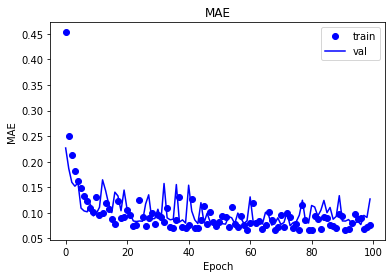

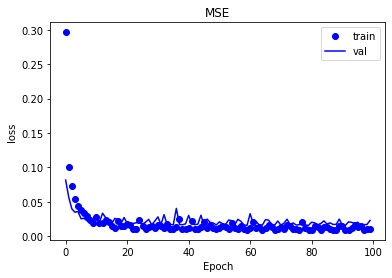

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(range( len(history_dic['mean_absolute_error'])), history_dic['mean_absolute_error'],'bo',label='train')
plt.plot(range(len(history_dic['val_mean_absolute_error'])), history_dic['val_mean_absolute_error'], 'b', label='val')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('MAE')
plt.legend()
plt.show()
plt.clf()
plt.plot(range(len(history_dic['loss'])), history_dic['loss'],'bo',label="train")
plt.plot(range(len(history_dic['val_loss'])), history_dic['val_loss'], 'b', label='val')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.title('MSE')
plt.legend()
plt.show()
plt.clf()